Theta0: 4.3088558146586635
Theta1: 3.189419572547279


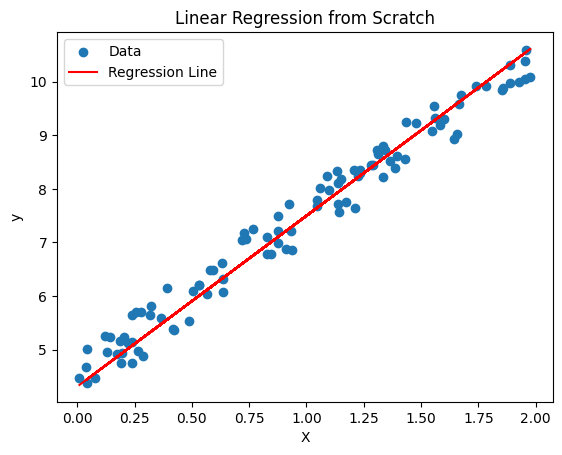

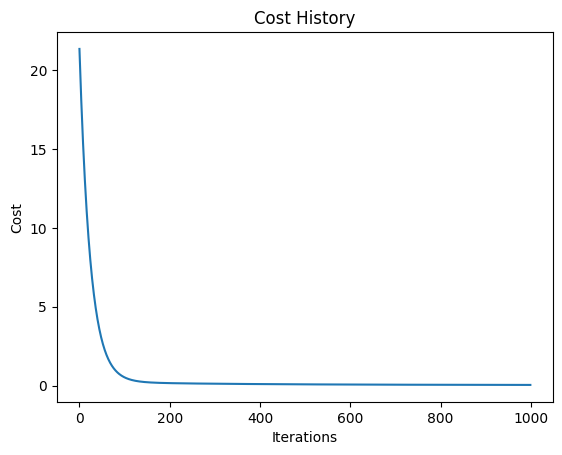

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# Define the number of iterations and learning rate
num_iterations = 1000
learning_rate = 0.01

# Initialize the coefficients
theta0 = np.random.rand()
theta1 = np.random.rand()

# Lists to store the cost history for plotting
cost_history = []

# Perform gradient descent
for iteration in range(num_iterations):
    y_pred = theta0 + theta1 * X
    error = y_pred - y
    cost = 1 / (2 * len(X)) * np.sum(error**2)
    cost_history.append(cost)
    gradient0 = 1 / len(X) * np.sum(error)
    gradient1 = 1 / len(X) * np.sum(error * X)
    theta0 -= learning_rate * gradient0
    theta1 -= learning_rate * gradient1

# Print the final coefficients
print("Theta0:", theta0)
print("Theta1:", theta1)

# Plot the data and the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, theta0 + theta1 * X, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression from Scratch')
plt.show()

# Plot the cost history
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()


Theta: [0.22755874 1.21167491 0.91172315]


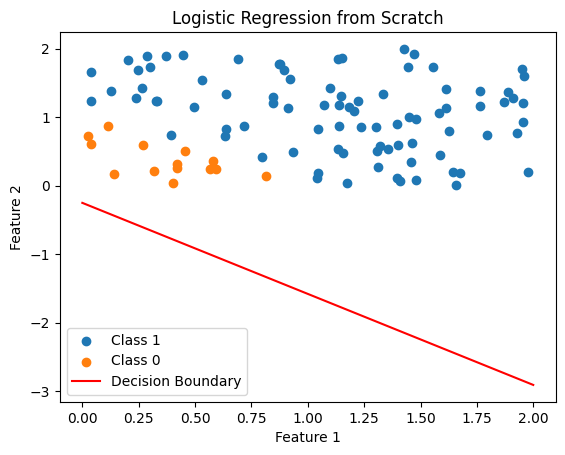

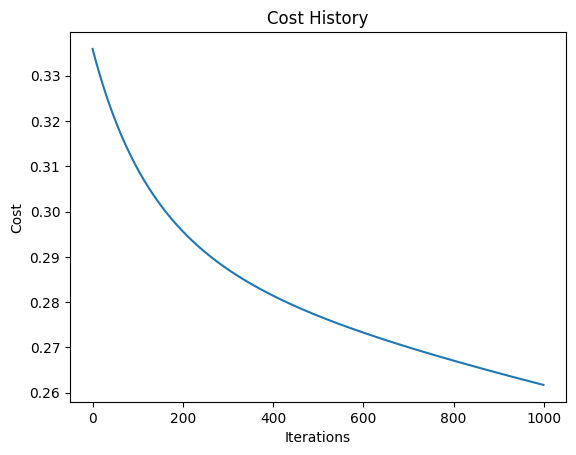

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for binary classification
np.random.seed(0)
X = 2 * np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Creating a binary target variable


num_iterations = 1000
learning_rate = 0.01

# Initialize the coefficients
theta = np.random.rand(3)  # We have two features, plus a bias term

X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Lists to store the cost history for plotting
cost_history = []

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Perform gradient descent
for iteration in range(num_iterations):
    z = np.dot(X_bias, theta)
    y_pred = sigmoid(z)
    error = y_pred - y
    cost = -1 / len(X) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    cost_history.append(cost)
    gradient = 1 / len(X) * np.dot(X_bias.T, error)
    theta -= learning_rate * gradient

# Print the final coefficients
print("Theta:", theta)


plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
x_boundary = np.array([0, 2])
y_boundary = (-theta[0] - theta[1] * x_boundary) / theta[2]
plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression from Scratch')
plt.show()

plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()


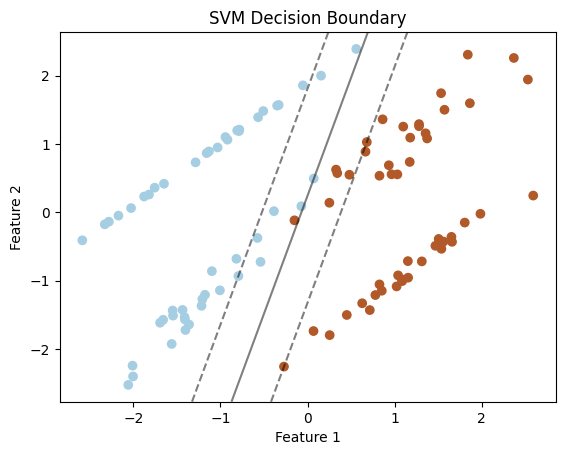

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Plot the decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid to evaluate the model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize the decision tree using Graphviz
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=data.feature_names,
                           class_names=data.target_names,
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")  # This will save the tree to a file (e.g., iris_decision_tree.pdf)


'iris_decision_tree.pdf'

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


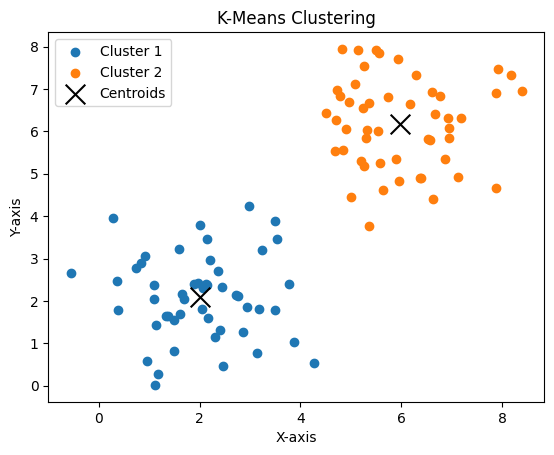

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data points
np.random.seed(0)
X = np.concatenate([np.random.normal(2, 1, (50, 2)), np.random.normal(6, 1, (50, 2))])

# Define the number of clusters
k = 2

# Initialize random cluster centroids
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Lists to store cluster assignments
cluster_assignments = np.zeros(X.shape[0])

# Define the number of iterations
num_iterations = 100

# Perform K-Means clustering
for _ in range(num_iterations):
    # Assign each data point to the nearest cluster
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        cluster_assignments[i] = np.argmin(distances)

    # Update the cluster centroids
    for cluster in range(k):
        cluster_points = X[cluster_assignments == cluster]
        centroids[cluster] = np.mean(cluster_points, axis=0)

# Plot the data points and cluster centroids
for cluster in range(k):
    cluster_points = X[cluster_assignments == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster+1}')

plt.scatter(centroids[:, 0], centroids[:, 1,], color='black', marker='x', s=200, label='Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


Explained Variance Ratios: [0.72962445 0.22850762]


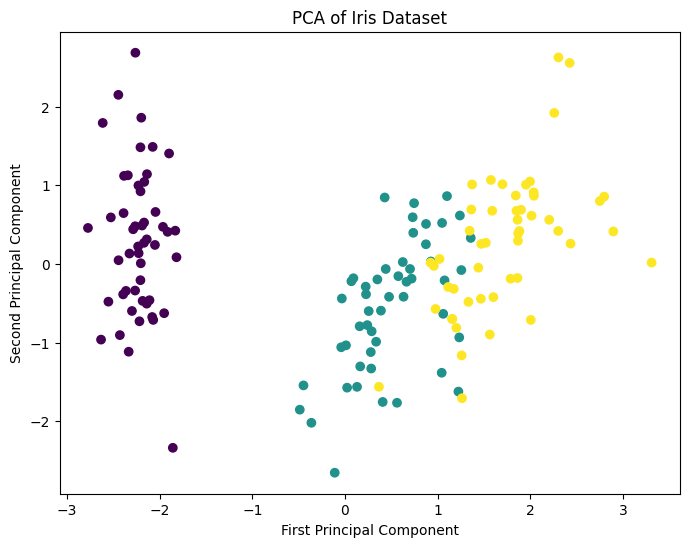

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
data = load_iris()
X = data.data

# Standardize the data (mean=0, variance=1)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Create a PCA object
pca = PCA(n_components=2)  # Reduce to 2 principal components

# Fit the data and transform it
X_pca = pca.fit_transform(X)

# Percentage of variance explained by each of the selected components
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratios:", explained_variance)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data.target, cmap='viridis')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of Iris Dataset")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5921 - accuracy: 0.4133 - val_loss: 1.3505 - val_accuracy: 0.5261
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2136 - accuracy: 0.5721 - val_loss: 1.0980 - val_accuracy: 0.6151
Epoch 3/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.0673 - accuracy: 0.6246 - val_loss: 1.0319 - val_accuracy: 0.6379
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9670 - accuracy: 0.6603 - val_loss: 0.9925 - val_accuracy: 0.6506
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8875 - accuracy: 0.6879 - val_loss: 0.9414 - val_accuracy: 0.6662
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8300 - accuracy: 0.7083 - val_loss: 0.9973 - val_accuracy: 0.6639
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7824 - accuracy: 0.7257 - val_loss: 0.8761 -

In [ ]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
